In [1]:
# Display the dimensions of the images
from matplotlib.image import imread
i = "363"
img = imread('natural_images/z_person/person_0'+ i +'.jpg')
print(img.shape)
img = imread('natural_images/z_car/car_0'+ i +'.jpg')
print(img.shape)
img = imread('natural_images/cat/cat_0'+ i +'.jpg')
print(img.shape)
img = imread('natural_images/z_dog/dog_0'+ i +'.jpg')
print(img.shape)
img = imread('natural_images/z_airplane/airplane_0'+ i +'.jpg')
print(img.shape)
img = imread('natural_images/motorbike/motorbike_0'+ i +'.jpg')
print(img.shape)
img = imread('natural_images/fruit/fruit_0'+ i +'.jpg')

(256, 256, 3)
(100, 100, 3)
(274, 365, 3)
(223, 237, 3)
(77, 309, 3)
(95, 165, 3)


In [2]:
# to resize and show a image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open("natural_images/z_person/person_0258.jpg")
my_image = np.array(image.resize((100, 100), Image.ANTIALIAS))
print(my_image.shape)
plt.imshow(my_image, cmap='gray')
plt.show()

(100, 100, 3)


<Figure size 640x480 with 1 Axes>

In [3]:
# CNN for person = 1, car = 0, dog = 2, airplane = 3 - 600 examples each for training
# training_x = (example,d,d,d), training_y = (example,d) -- > ofter one-hot encoding
for i in range(1, 601):
    if(i <= 999 & i > 99):
        image_address = "natural_images/z_car/car_0" + str(i) + ".jpg"
    if(i <= 99 & i > 9):
        image_address = "natural_images/z_car/car_00" + str(i) + ".jpg"
    if(i <= 9 & i > 0):
        image_address = "natural_images/z_car/car_000" + str(i) + ".jpg"
    image = Image.open(image_address)
    my_image = np.array(image.resize((150, 150), Image.ANTIALIAS))
    my_image = my_image.reshape(1,150,150,3)
    if(i == 1):
        train_x = my_image
        train_y = np.array([0]).reshape(1,1)
    else:
        train_x = np.append(train_x, my_image, axis = 0)
        temp = np.array([0]).reshape(1,1)
        train_y = np.append(train_y, temp, axis = 0)
print(train_x.shape)
print(train_y.shape)
for i in range(1, 601):
    if(i <= 999 & i > 99):
        image_address = "natural_images/z_person/person_0" + str(i) + ".jpg"
    if(i <= 99 & i > 9):
        image_address = "natural_images/z_person/person_00" + str(i) + ".jpg"
    if(i <= 9 & i > 0):
        image_address = "natural_images/z_person/person_000" + str(i) + ".jpg"
    image = Image.open(image_address)
    my_image = np.array(image.resize((150, 150), Image.ANTIALIAS))
    my_image = my_image.reshape(1,150,150,3)

    train_x = np.append(train_x, my_image, axis = 0)
    temp = np.array([1]).reshape(1,1)
    train_y = np.append(train_y, temp, axis = 0)
print(train_x.shape)
print(train_y.shape)
for i in range(1, 601):
    if(i <= 999 & i > 99):
        image_address = "natural_images/z_dog/dog_0" + str(i) + ".jpg"
    if(i <= 99 & i > 9):
        image_address = "natural_images/z_dog/dog_00" + str(i) + ".jpg"
    if(i <= 9 & i > 0):
        image_address = "natural_images/z_dog/dog_000" + str(i) + ".jpg"
    image = Image.open(image_address)
    my_image = np.array(image.resize((150, 150), Image.ANTIALIAS))
    my_image = my_image.reshape(1,150,150,3)
    
    train_x = np.append(train_x, my_image, axis = 0)
    temp = np.array([2]).reshape(1,1)
    train_y = np.append(train_y, temp, axis = 0)
print(train_x.shape)
print(train_y.shape)
for i in range(1, 601):
    if(i <= 999 & i > 99):
        image_address = "natural_images/z_airplane/airplane_0" + str(i) + ".jpg"
    if(i <= 99 & i > 9):
        image_address = "natural_images/z_airplane/airplane_00" + str(i) + ".jpg"
    if(i <= 9 & i > 0):
        image_address = "natural_images/z_airplane/airplane_000" + str(i) + ".jpg"
    image = Image.open(image_address)
    my_image = np.array(image.resize((150, 150), Image.ANTIALIAS))
    my_image = my_image.reshape(1,150,150,3)
    train_x = np.append(train_x, my_image, axis = 0)
    temp = np.array([3]).reshape(1,1)
    train_y = np.append(train_y, temp, axis = 0)
print(train_x.shape)
print(train_y.shape)
train_x_backup = train_x
train_y_backup = train_y
nb_classes = 4
targets = train_y.reshape(-1)
train_y = np.eye(nb_classes)[targets]
print(train_y.shape)
train_x = train_x/255.

(600, 150, 150, 3)
(600, 1)
(1200, 150, 150, 3)
(1200, 1)
(1800, 150, 150, 3)
(1800, 1)
(2400, 150, 150, 3)
(2400, 1)
(2400, 4)


In [5]:
# testing out a case!!!!!!
x = np.array([[1,2,3]])
y = np.array([[4,5,6]])
x = x.reshape(1,1,3)
y = y.reshape(1,1,3)
#print(x.shape, y.shape)
z = np.append(x,y,axis = 0)
#print(z)
#print(z.shape)
x = np.array([1])
y = np.array([1])
x = x.reshape(1,1)
y = y.reshape(1,1)
#print(x.shape, y.shape)
z = np.append(x,y,axis = 0)
#print(z.shape)

In [7]:
import tensorflow as tf

tf.reset_default_graph()
print(train_x.shape[1])
print(train_x.shape[2])
print(train_x.shape[3])
print(train_y.shape[1])
tf_x = tf.placeholder(tf.float32, shape=(None, train_x.shape[1], train_x.shape[2], train_x.shape[3]), name='tf_x')
tf_y = tf.placeholder(tf.float32, shape=(None, train_y.shape[1]), name='tf_y')
print(tf_x)
print(tf_y)

150
150
3
4
Tensor("tf_x:0", shape=(?, 150, 150, 3), dtype=float32)
Tensor("tf_y:0", shape=(?, 4), dtype=float32)


In [6]:
# w1 - 8 filters
# w2 - 16 filter
W1 = tf.get_variable('W1', shape=(4,4,3,8), initializer=tf.contrib.layers.xavier_initializer(seed=0))
W2 = tf.get_variable('W2', shape=(2,2,8,16), initializer=tf.contrib.layers.xavier_initializer(seed=0))

parameters = {"W1": W1, "W2": W2}

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [7]:
W1 = parameters['W1']
W2 = parameters['W2']
    
#stride of 1 and padding 'SAME'
Z1 = tf.nn.conv2d(tf_x, W1, strides=[1, 1, 1, 1], padding='SAME')
# RELU - Activation
A1 = tf.nn.relu(Z1)
# window 8x8, stride 8, padding 'SAME'
P1 = tf.nn.max_pool(A1, ksize=[1, 8, 8, 1], strides=[1, 8, 8, 1], padding='SAME')
# stride 1, padding 'SAME'
Z2 = tf.nn.conv2d(P1, W2, strides=[1, 1, 1, 1], padding='SAME')
# RELU
A2 = tf.nn.relu(Z2)
# stride 4 and padding 'SAME'
P2 = tf.nn.max_pool(A2, ksize=[1, 4, 4, 1], strides=[1, 4, 4, 1], padding='SAME')
# FLATTEN
P2 = tf.contrib.layers.flatten(P2)
# FULLY-CONNECTED without non-linear activation function.
# 4 node for 4 class
Z3 = tf.contrib.layers.fully_connected(P2, 4, activation_fn=None)

Instructions for updating:
Use keras.layers.flatten instead.


In [8]:
Z3

<tf.Tensor 'fully_connected/BiasAdd:0' shape=(?, 4) dtype=float32>

In [9]:
tf_x

<tf.Tensor 'tf_x:0' shape=(?, 150, 150, 3) dtype=float32>

In [10]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z3, labels=tf_y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [11]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):

    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # shuffle
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

Cost after epoch 0: 0.037294
Cost after epoch 0: 0.073629
Cost after epoch 0: 0.111776
Cost after epoch 0: 0.148000
Cost after epoch 0: 0.185208
Cost after epoch 0: 0.221408
Cost after epoch 0: 0.258223
Cost after epoch 0: 0.295222
Cost after epoch 0: 0.332091
Cost after epoch 0: 0.368329
Cost after epoch 0: 0.403952
Cost after epoch 0: 0.439626
Cost after epoch 0: 0.475379
Cost after epoch 0: 0.511152
Cost after epoch 0: 0.546647
Cost after epoch 0: 0.582394
Cost after epoch 0: 0.617943
Cost after epoch 0: 0.652331
Cost after epoch 0: 0.687494
Cost after epoch 0: 0.722354
Cost after epoch 0: 0.756491
Cost after epoch 0: 0.790951
Cost after epoch 0: 0.825271
Cost after epoch 0: 0.859369
Cost after epoch 0: 0.893340
Cost after epoch 0: 0.927142
Cost after epoch 0: 0.960248
Cost after epoch 0: 0.993321
Cost after epoch 0: 1.025641
Cost after epoch 0: 1.056989
Cost after epoch 0: 1.088495
Cost after epoch 0: 1.120179
Cost after epoch 0: 1.150853
Cost after epoch 0: 1.181656
Cost after epo

Cost after epoch 35: 0.008447
Cost after epoch 35: 0.008951
Cost after epoch 35: 0.010562
Cost after epoch 35: 0.010933
Cost after epoch 35: 0.013054
Cost after epoch 35: 0.013360
Cost after epoch 35: 0.014300
Cost after epoch 35: 0.014905
Cost after epoch 35: 0.015445
Cost after epoch 35: 0.018005
Cost after epoch 35: 0.018343
Cost after epoch 35: 0.018927
Cost after epoch 35: 0.019099
Cost after epoch 35: 0.019425
Cost after epoch 35: 0.019640
Cost after epoch 35: 0.019863
Cost after epoch 35: 0.020435
Cost after epoch 35: 0.020727
Cost after epoch 35: 0.022036
Cost after epoch 35: 0.022363
Cost after epoch 35: 0.022535
Cost after epoch 35: 0.024517
Cost after epoch 35: 0.024744
Cost after epoch 35: 0.024993
Cost after epoch 35: 0.025830
Cost after epoch 35: 0.026803
Cost after epoch 35: 0.027852
Cost after epoch 35: 0.028095
Cost after epoch 40: 0.000124
Cost after epoch 40: 0.001848
Cost after epoch 40: 0.002089
Cost after epoch 40: 0.002374
Cost after epoch 40: 0.002538
Cost after

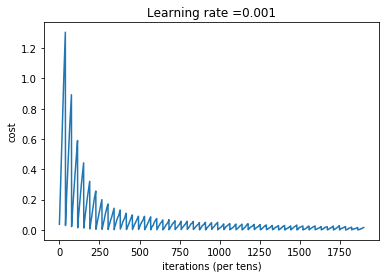

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.9920833


In [12]:
import math

seed = 3
(m, n_H0, n_W0, n_C0) = train_x.shape             
n_y = train_y.shape[1]                            
costs = []
num_epochs = 50
minibatch_size = 64
print_cost = True

# Initialize all the variables globally
init = tf.global_variables_initializer()
     
# Start the session to compute the tensorflow graph
with tf.Session() as sess:
        
    sess.run(init)
        
    for epoch in range(num_epochs):

        minibatch_cost = 0.
        num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
        seed = seed + 1
        minibatches = random_mini_batches(train_x, train_y, minibatch_size, seed)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch
            _ , temp_cost = sess.run([optimizer, cost], feed_dict={tf_x:minibatch_X, tf_y:minibatch_Y})
    
            minibatch_cost += temp_cost / num_minibatches
                
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(0.001))
    plt.show()
    # Calculate the correct predictions
    saver = tf.train.Saver()
    saver.save(sess, 'natural_image_model') 
    predict_op = tf.argmax(Z3,1)
    correct_prediction = tf.equal(predict_op, tf.argmax(tf_y,1))
    
    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(accuracy)
    train_accuracy = accuracy.eval({tf_x: train_x, tf_y: train_y})
    #test_accuracy = accuracy.eval({tf_x: X_test, tf_y: Y_test})
    print("Train Accuracy:", train_accuracy)
    #print("Test Accuracy:", test_accuracy)

In [13]:
# save the weights
saver = tf.train.import_meta_graph('natural_image_model.meta')

In [14]:
# Restore the weights
sess = tf.Session()
saver.restore(sess, tf.train.latest_checkpoint('./'))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./natural_image_model


In [22]:
# Predict
image_address = "natural_images/z_dog/dog_0658.jpg"
image = Image.open(image_address)
my_image = np.array(image.resize((150, 150), Image.ANTIALIAS))
my_image = my_image.reshape(1,150,150,3)
print(my_image.shape)
my_image = my_image/255.

(1, 150, 150, 3)


In [16]:
# Final Layer
graph = tf.get_default_graph()
y_pred = graph.get_tensor_by_name("fully_connected/BiasAdd:0")

In [17]:
x= graph.get_tensor_by_name("tf_x:0") 

In [18]:
y_true = graph.get_tensor_by_name("tf_y:0") 

In [23]:
# Run the session to get the prediction
y_test_images = np.zeros((1, 4)) 
feed_dict_testing = {x: my_image, y_true: y_test_images}
result=sess.run(y_pred, feed_dict=feed_dict_testing)

In [24]:
sess.run(tf.argmax(result,1))

array([3])

In [21]:
# CNN for person = 1, car = 0, dog = 2, airplane = 3 - 600 examples each for training